<a href="https://colab.research.google.com/github/atlas-github/fstep_19/blob/master/intro_to_bigdata%26ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

1. What is [Google Colab](https://research.google.com/colaboratory/faq.html)?
2. Click Connect
3. Try uploading a document
4. Explain Runtime types
5. Try a few settings

#Upload and view a spreadsheet

In [1]:
import pandas as pd
df = pd.read_csv("sample-users.csv")
df

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
16271,user_19425,1994,Ireland,0,Regular
16272,user_19426,1977,Estonia,0,Regular
16273,user_19427,1991,Poland,0,Regular
16274,user_19428,1984,United Kingdom,0,Regular


#Build a simple [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)


In [2]:
import numpy as np 

table = pd.pivot_table(df, index = ['country'], values = 'user_settings', columns = ['plan'], aggfunc = 'count')
table

plan,Premium,Regular,Special
country,,,
Denmark,22,409,15
Estonia,31,939,21
France,101,1925,84
Ireland,41,1137,36
Lithuania,10,630,6
Malta,17,510,21
Poland,41,2231,34
Portugal,16,577,11
Romania,78,966,52


#P1: Compile several worksheets using [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [3]:
df1 = pd.read_excel('sample-user_parts.xlsx', sheet_name='Sheet1')
df1

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
3993,user_4654,1992,United Kingdom,0,Regular
3994,user_4655,1996,United Kingdom,1,Premium
3995,user_4656,1994,Poland,0,Regular
3996,user_4657,1967,Ireland,1,Regular


In [4]:
df2 = pd.concat(pd.read_excel('sample-user_parts.xlsx', sheet_name=None), ignore_index=True)
df2

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
16270,user_19425,1994,Ireland,0,Regular
16271,user_19426,1977,Estonia,0,Regular
16272,user_19427,1991,Poland,0,Regular
16273,user_19428,1984,United Kingdom,0,Regular


#P2: Extract table from pdf using [Tabula](https://pypi.org/project/tabula-py/)

In [5]:
!pip install tabula-py

     |████████████████████████████████| 11.7MB 337kB/s 


In [6]:
import tabula

# Read pdf into list of DataFrame
sample_list = tabula.read_pdf("cimb-2019-financial-statements.pdf", pages='5')

sample_list

[                                           Unnamed: 0  ...         2015
 0                                      Key Highlights  ...       RM’000
 1                    Consolidated Statement of Income  ...          NaN
 2                                    Operating income  ...   15,395,790
 3                                           Overheads  ...    9,248,978
 4                Profit before expected credit losses  ...    6,146,812
 5       Expected credit losses on loans, advances and  ...          NaN
 6                                           financing  ...    2,168,624
 7                    Profit before taxation and zakat  ...    3,913,993
 8                   Net profit for the financial year  ...    2,849,509
 9        Consolidated Statement of Financial Position  ...          NaN
 10                Gross loans, advances and financing  ...  297,822,144
 11                                       Total assets  ...  461,577,143
 12                           Deposits from custome

In [7]:
df_cimb = sample_list[0]
df_cimb

,Unnamed: 0,2019,2018,2017,2016,2015
0,Key Highlights,RM’000,RM’000,RM’000,RM’000,RM’000
1,Consolidated Statement of Income,NaN,NaN,NaN,NaN,NaN
2,Operating income,"17,795,879","17,381,968","17,626,496","16,065,255","15,395,790"
3,Overheads,"9,872,905","8,655,821","9,133,575","8,651,690","9,248,978"
4,Profit before expected credit losses,"7,922,974","8,726,147","8,492,921","7,413,565","6,146,812"
5,"Expected credit losses on loans, advances and",NaN,NaN,NaN,NaN,NaN
6,financing,"1,638,785","1,432,661","2,230,907","2,408,883","2,168,624"
7,Profit before taxation and zakat,"5,974,840","7,200,667","6,109,985","4,884,144","3,913,993"
8,Net profit for the financial year,"4,559,656","5,583,510","4,475,175","3,564,190","2,849,509"
9,Consolidated Statement of Financial Position,NaN,NaN,NaN,NaN,NaN


In [8]:
#clean header row

df_cimb = df_cimb.rename(columns = {"Unnamed: 0" : "Key Highlights"})
df1_cimb = df_cimb.drop([0])

#merge rows 5 & 6

df1_cimb = df1_cimb.replace(to_replace = "financing", value = "Expected credit losses on loans, advances and financing")
df2_cimb = df1_cimb.drop([5])

#merge rows 35 & 36

df2_cimb = df2_cimb.replace(to_replace = "– basic", value = "Earnings per share (sen)")
df3_cimb = df2_cimb.drop([35])

#replace NaNs
df3_cimb = df3_cimb.fillna('')
df3_cimb

,Key Highlights,2019,2018,2017,2016,2015
1,Consolidated Statement of Income,,,,,
2,Operating income,"17,795,879","17,381,968","17,626,496","16,065,255","15,395,790"
3,Overheads,"9,872,905","8,655,821","9,133,575","8,651,690","9,248,978"
4,Profit before expected credit losses,"7,922,974","8,726,147","8,492,921","7,413,565","6,146,812"
6,"Expected credit losses on loans, advances and ...","1,638,785","1,432,661","2,230,907","2,408,883","2,168,624"
7,Profit before taxation and zakat,"5,974,840","7,200,667","6,109,985","4,884,144","3,913,993"
8,Net profit for the financial year,"4,559,656","5,583,510","4,475,175","3,564,190","2,849,509"
9,Consolidated Statement of Financial Position,,,,,
10,"Gross loans, advances and financing","369,491,503","346,290,529","324,218,054","323,719,559","297,822,144"
11,Total assets,"573,245,655","534,089,043","506,499,532","485,766,887","461,577,143"


In [9]:
df3_cimb.to_csv("cimb-sample.csv")
from google.colab import files
files.download("cimb-sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#P3: Join tables using [pd.merge()]()

In [10]:
users = pd.read_csv("sample-users.csv")
users.head()

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular


In [11]:
devices = pd.read_csv("sample-devices.csv")
devices.head()

,brand,user_id
0,Android,user_3257
1,Apple,user_6809
2,Android,user_9144
3,Apple,user_3636
4,Android,user_5970


In [12]:
users_devices = users.merge(devices, on = "user_id")
users_devices

,user_id,birth_year,country,user_settings,plan,brand
0,user_0,1989,Poland,1,Regular,Apple
1,user_1,1975,United Kingdom,0,Regular,Apple
2,user_2,1987,Poland,0,Regular,Android
3,user_3,1994,France,0,Regular,Apple
4,user_4,1985,United Kingdom,0,Regular,Apple
...,...,...,...,...,...,...
16271,user_19425,1994,Ireland,0,Regular,Apple
16272,user_19426,1977,Estonia,0,Regular,Apple
16273,user_19427,1991,Poland,0,Regular,Android
16274,user_19428,1984,United Kingdom,0,Regular,Android


In [14]:
result = devices.merge(users, on = "user_id")
result

,brand,user_id,birth_year,country,user_settings,plan
0,Android,user_3257,1988,United Kingdom,0,Regular
1,Apple,user_6809,1994,Estonia,0,Regular
2,Android,user_9144,1993,United Kingdom,0,Premium
3,Apple,user_3636,2000,United Kingdom,0,Regular
4,Android,user_5970,1991,United Kingdom,0,Regular
...,...,...,...,...,...,...
16271,Apple,user_18696,1992,France,0,Regular
16272,Android,user_16188,1972,Poland,0,Regular
16273,Android,user_10190,1986,United Kingdom,0,Regular
16274,Android,user_14554,1994,France,0,Regular


#P4: Text functions

In [17]:
result

,brand,user_id,birth_year,country,user_settings,plan
0,Android,user_3257,1988,United Kingdom,0,Regular
1,Apple,user_6809,1994,Estonia,0,Regular
2,Android,user_9144,1993,United Kingdom,0,Premium
3,Apple,user_3636,2000,United Kingdom,0,Regular
4,Android,user_5970,1991,United Kingdom,0,Regular
...,...,...,...,...,...,...
16271,Apple,user_18696,1992,France,0,Regular
16272,Android,user_16188,1972,Poland,0,Regular
16273,Android,user_10190,1986,United Kingdom,0,Regular
16274,Android,user_14554,1994,France,0,Regular


In [22]:
result['user_id'].str.split('_', 1, expand = True)

,0,1
0,user,3257
1,user,6809
2,user,9144
3,user,3636
4,user,5970
...,...,...
16271,user,18696
16272,user,16188
16273,user,10190
16274,user,14554


In [23]:
result.join(result['user_id'].str.split('_', 1, expand = True).rename(columns={0:'user', 1:'id'}))

,brand,user_id,birth_year,country,user_settings,plan,user,id
0,Android,user_3257,1988,United Kingdom,0,Regular,user,3257
1,Apple,user_6809,1994,Estonia,0,Regular,user,6809
2,Android,user_9144,1993,United Kingdom,0,Premium,user,9144
3,Apple,user_3636,2000,United Kingdom,0,Regular,user,3636
4,Android,user_5970,1991,United Kingdom,0,Regular,user,5970
...,...,...,...,...,...,...,...,...
16271,Apple,user_18696,1992,France,0,Regular,user,18696
16272,Android,user_16188,1972,Poland,0,Regular,user,16188
16273,Android,user_10190,1986,United Kingdom,0,Regular,user,10190
16274,Android,user_14554,1994,France,0,Regular,user,14554


#P5: Data analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


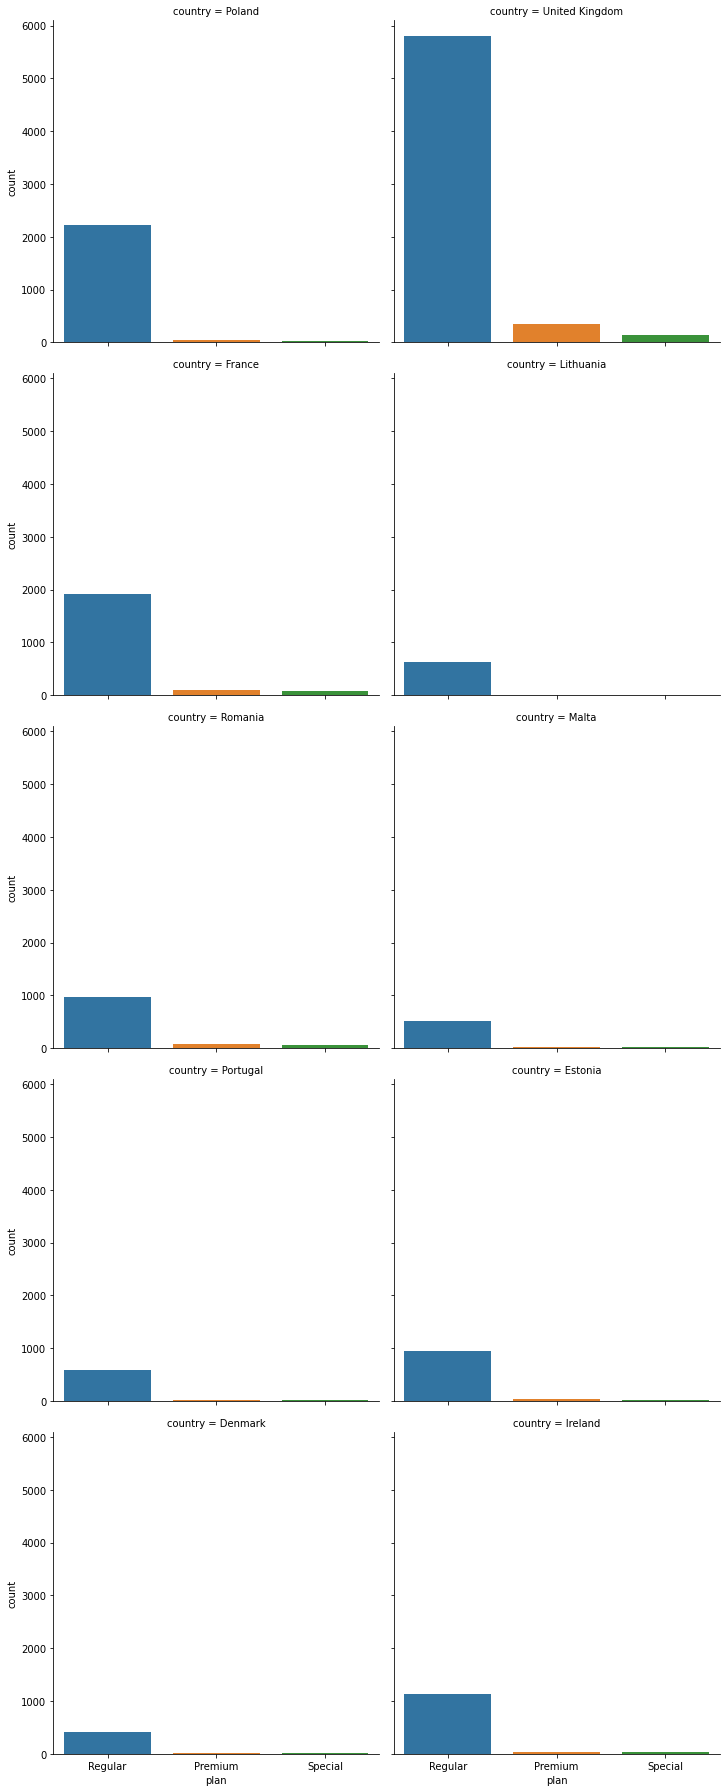

In [24]:
import seaborn as sns
plot1 = sns.catplot(x = "plan", col = "country", col_wrap = 2, data = users_devices, kind = "count")
plot1

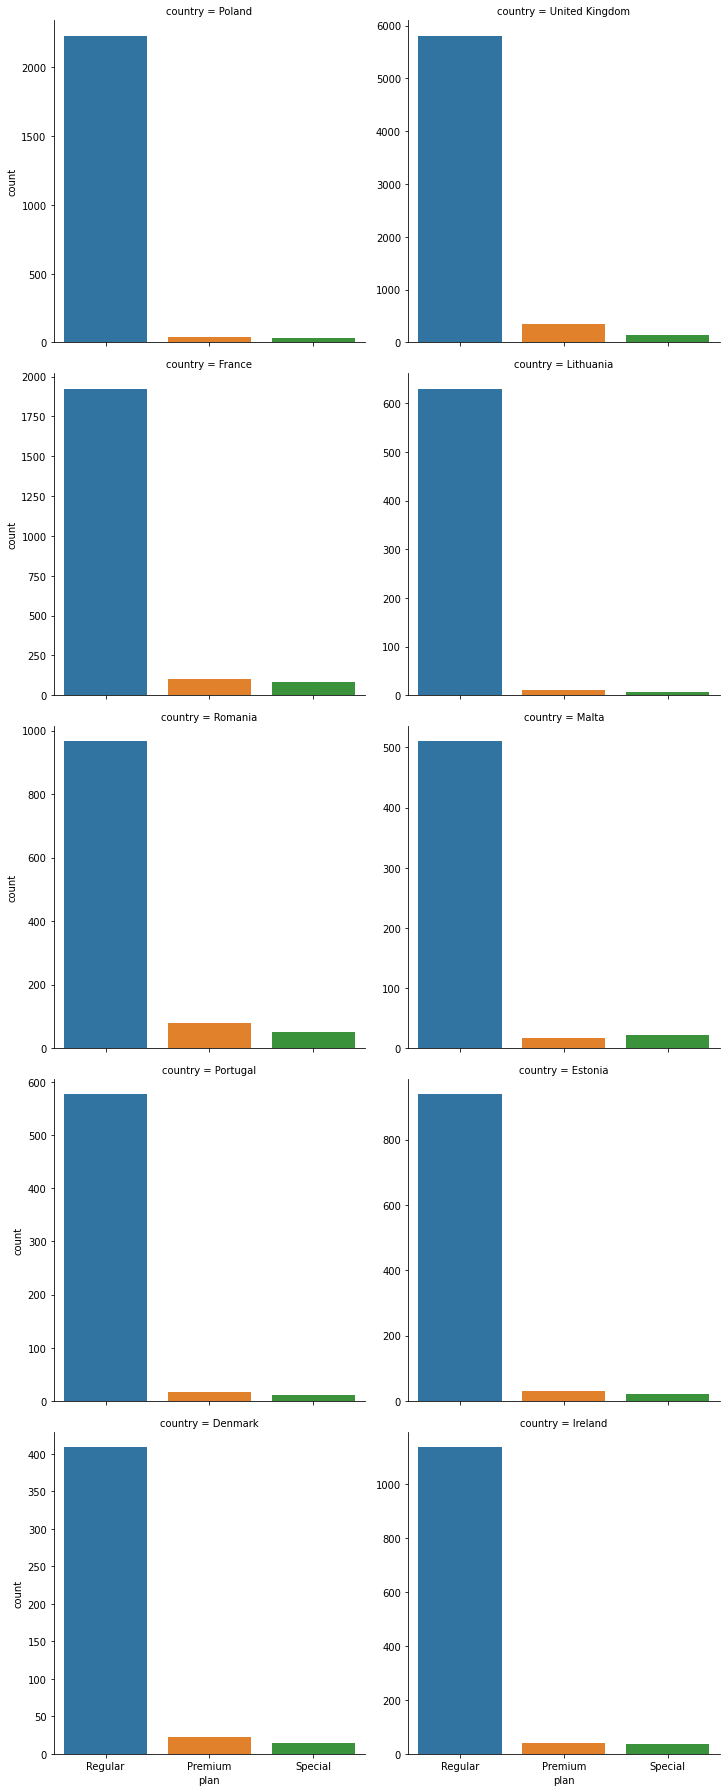

In [26]:
import seaborn as sns
plot1 = sns.catplot(x = "plan", col = "country", col_wrap = 2, data = users_devices, kind = "count", sharey = False)
plot1

#Web-scraping using [Beautiful Soup](https://pypi.org/project/beautifulsoup4/)

##Import packages

In [27]:
import pandas as pd

##Scrape [malaysiastock.biz](https://www.malaysiastock.biz/Listed-Companies.aspx?type=A&value=A)

In [82]:
data = pd.read_html("https://www.malaysiastock.biz/Listed-Companies.aspx?type=A&value=A")
data

[    0                                   1
 0 NaN  Welcome! Sign In | Register (Free),
                                                    0                  1
 0  Highlights:Advanced technical chart, more than...    Ad Free Version
 1                                                NaN                NaN
 2                                                NaN  Shariah Mode: Off
 3                                                NaN                NaN,
     0   1
 0 NaN NaN,
                                                     0   ...   26
 0    0 - 9  A  B  C  D  E  F  G  H  I  J  K  L  M  ...  ...  NaN
 1                                                0 - 9  ...    Z
 2                                              FBMKLCI  ...  NaN
 3                                              Sector:  ...  NaN
 4                                              Company  ...  NaN
 ..                                                 ...  ...  ...
 100                                               DKLS  ...  

In [83]:
pd.DataFrame(data[7])

,Company,Shariah,Sector,Market Cap,Last Price,PE,DY,ROE
0,AASIA (7054)MAINASTRAL ASIA BERHAD,NaN,Plantation,82.50m,0.13,-,0.00,-5.14
1,AAX (5238)MAINAIRASIA X BERHAD,NaN,"Travel, Leisure & Hospitality",228.15m,0.06,-,0.00,-
2,ABFMY1 (0800EA)ETFABF MALAYSIA BOND INDEX FUND,NaN,Bond Fund,1.651b,1.25,-,2.90,-
3,ABLEGRP (7086)MAINABLEGROUP BERHAD,NaN,Building Materials,32.99m,0.13,-,0.00,-1.88
4,ABMB (2488)MAINALLIANCE BANK MALAYSIA BERHAD,NaN,Banking,3.375b,2.18,7.47,7.66,7.24
...,...,...,...,...,...,...,...,...
74,AXIATA (6888)MAINAXIATA GROUP BERHAD,NaN,Telecommunications Service Providers,27.233b,2.97,37.79,3.20,4.47
75,AXREIT (5106)MAINAXIS REAL ESTATE INVESTMENT T...,NaN,Real Estate Investment Trusts,3.115b,2.16,14.56,4.29,10.03
76,AYER (2305)MAINAYER HOLDINGS BERHAD,NaN,Property,392.98m,5.25,36.18,0.86,2.08
77,AYS (5021)MAINAYS VENTURES BERHAD,NaN,Building Materials,70.38m,0.19,-,5.41,-7.30


In [58]:
alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [89]:
table= pd.DataFrame()

In [93]:
for i in range(len(alphabet)):
  url = 'https://www.malaysiastock.biz/Listed-Companies.aspx?type=A&value='+alphabet[i]
  data = pd.read_html(url)
  table = table.append(pd.DataFrame(data[7]), ignore_index = True)

table

,Company,Shariah,Sector,Market Cap,Last Price,PE,DY,ROE
0,AASIA (7054)MAINASTRAL ASIA BERHAD,NaN,Plantation,82.50m,0.13,-,0,-5.14
1,AAX (5238)MAINAIRASIA X BERHAD,NaN,"Travel, Leisure & Hospitality",228.15m,0.06,-,0,-
2,ABFMY1 (0800EA)ETFABF MALAYSIA BOND INDEX FUND,NaN,Bond Fund,1.651b,1.25,-,2.9,-
3,ABLEGRP (7086)MAINABLEGROUP BERHAD,NaN,Building Materials,32.99m,0.13,-,0,-1.88
4,ABMB (2488)MAINALLIANCE BANK MALAYSIA BERHAD,NaN,Banking,3.375b,2.18,7.47,7.66,7.24
...,...,...,...,...,...,...,...,...
957,YTLPOWR (6742)MAINYTL POWER INTERNATIONAL BHD,NaN,"Gas, Water & Multi-utilities",5.507b,0.68,85.44,7.41,0.51
958,YTLREIT (5109)MAINYTL HOSPITALITY REIT,NaN,Real Estate Investment Trusts,1.219b,0.72,127.68,9.4,0.37
959,ZECON (7028)MAINZECON BERHAD,NaN,Construction,64.13m,0.45,1.61,0,15.32
960,ZELAN (2283)MAINZELAN BERHAD,NaN,Construction,92.94m,0.11,13.1,0,16.8


In [97]:
table = table.join(table['Company'].str.split(')', 1, expand = True).rename(columns={0:'Code', 1:'Company Name'}))
table

,Company,Shariah,Sector,Market Cap,Last Price,PE,DY,ROE,Code,Company Name
0,AASIA (7054)MAINASTRAL ASIA BERHAD,NaN,Plantation,82.50m,0.13,-,0,-5.14,AASIA (7054,MAINASTRAL ASIA BERHAD
1,AAX (5238)MAINAIRASIA X BERHAD,NaN,"Travel, Leisure & Hospitality",228.15m,0.06,-,0,-,AAX (5238,MAINAIRASIA X BERHAD
2,ABFMY1 (0800EA)ETFABF MALAYSIA BOND INDEX FUND,NaN,Bond Fund,1.651b,1.25,-,2.9,-,ABFMY1 (0800EA,ETFABF MALAYSIA BOND INDEX FUND
3,ABLEGRP (7086)MAINABLEGROUP BERHAD,NaN,Building Materials,32.99m,0.13,-,0,-1.88,ABLEGRP (7086,MAINABLEGROUP BERHAD
4,ABMB (2488)MAINALLIANCE BANK MALAYSIA BERHAD,NaN,Banking,3.375b,2.18,7.47,7.66,7.24,ABMB (2488,MAINALLIANCE BANK MALAYSIA BERHAD
...,...,...,...,...,...,...,...,...,...,...
957,YTLPOWR (6742)MAINYTL POWER INTERNATIONAL BHD,NaN,"Gas, Water & Multi-utilities",5.507b,0.68,85.44,7.41,0.51,YTLPOWR (6742,MAINYTL POWER INTERNATIONAL BHD
958,YTLREIT (5109)MAINYTL HOSPITALITY REIT,NaN,Real Estate Investment Trusts,1.219b,0.72,127.68,9.4,0.37,YTLREIT (5109,MAINYTL HOSPITALITY REIT
959,ZECON (7028)MAINZECON BERHAD,NaN,Construction,64.13m,0.45,1.61,0,15.32,ZECON (7028,MAINZECON BERHAD
960,ZELAN (2283)MAINZELAN BERHAD,NaN,Construction,92.94m,0.11,13.1,0,16.8,ZELAN (2283,MAINZELAN BERHAD


#Download file

In [98]:
table.to_csv("malaysiastockbiz.csv")
from google.colab import files
files.download("malaysiastockbiz.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Logistic Regression using [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [6]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [10]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver = 'liblinear')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [19]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8072916666666666


#A more complex example

In [1]:
import pandas as pd
df = pd.read_csv("user_transactions.csv")
df

,id,user_id,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,last_transaction_month,months,transaction_april,transaction_may
0,0,user_0,13684,389,254,135,May-19,0,1,1
1,1,user_1,6104,129,113,16,Feb-19,3,0,0
2,2,user_2,1335,96,68,28,Apr-19,1,1,0
3,3,user_3,16578,268,266,2,Mar-19,2,0,0
4,4,user_4,9127,47,43,4,Jan-19,4,0,0
...,...,...,...,...,...,...,...,...,...,...
18663,19425,user_19425,598,24,2,22,May-19,0,1,1
18664,19426,user_19426,33168,178,4,174,May-19,0,1,1
18665,19427,user_19427,1243,130,0,130,May-19,0,1,1
18666,19428,user_19428,1277,22,2,20,Apr-19,1,1,0


In [103]:
df.describe()

,id,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,months,transaction_april,transaction_may
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,9639.734465,10277.461378,144.402668,74.101028,70.301639,2.230823,0.612599,0.469466
std,5603.113411,42414.728328,242.768788,137.872083,134.154116,3.402645,0.487170,0.499080
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4778.750000,462.000000,17.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,9584.500000,2511.000000,60.000000,25.000000,22.000000,1.000000,1.000000,0.000000
75%,14482.250000,8050.250000,164.000000,81.000000,76.000000,3.000000,1.000000,1.000000
max,19429.000000,970341.000000,5285.000000,2283.000000,3242.000000,16.000000,1.000000,1.000000


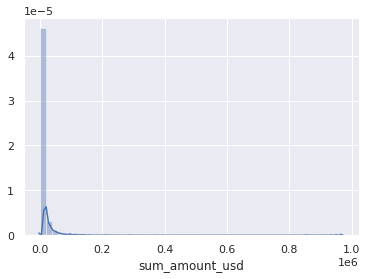

In [100]:
import seaborn as sns
sns.set()
ax = sns.distplot(df["sum_amount_usd"])
ax

In [101]:
import numpy as np
from sklearn.preprocessing import RobustScaler

#columns as independent variables
x = df[['sum_amount_usd', 'count_amount_usd', 'transactions_2018', 'transactions_2019_May', "months"]].values

#fit the columns into RobustScaler and transform
transformer = RobustScaler().fit(x)
x_scaled = transformer.transform(x)

#preview the data
df_temp = pd.DataFrame(x_scaled, columns = ['sum_amount_usd', 'count_amount_usd', 'transactions_2018', 'transactions_2019_May', "months"], index = df.index)
df_temp

,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,months
0,1.472408,2.238095,3.013158,1.527027,-0.333333
1,0.473495,0.469388,1.157895,-0.081081,0.666667
2,-0.154976,0.244898,0.565789,0.081081,0.000000
3,1.853787,1.414966,3.171053,-0.270270,0.333333
4,0.871874,-0.088435,0.236842,-0.243243,1.000000
...,...,...,...,...,...
18663,-0.252100,-0.244898,-0.302632,0.000000,-0.333333
18664,4.040062,0.802721,-0.276316,2.054054,-0.333333
18665,-0.167100,0.476190,-0.328947,1.459459,-0.333333
18666,-0.162620,-0.258503,-0.302632,-0.027027,0.000000


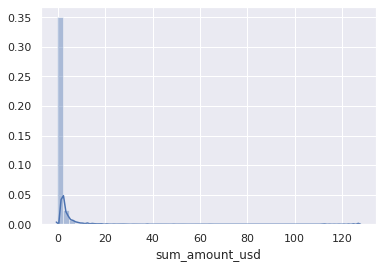

In [104]:
ay = sns.distplot(df_temp["sum_amount_usd"])
ay

In [105]:
df_temp.describe()

,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,months
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,1.023485,0.574168,0.646066,0.652725,0.410274
std,5.589527,1.651488,1.814106,1.812893,1.134215
min,-0.330906,-0.401361,-0.328947,-0.297297,-0.333333
25%,-0.270023,-0.292517,-0.263158,-0.270270,-0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.729977,0.707483,0.736842,0.729730,0.666667
max,127.543241,35.544218,29.710526,43.513514,5.000000


In [106]:
df['sum_amount_usd'] = df_temp['sum_amount_usd']
df['count_amount_usd'] = df_temp['count_amount_usd']
df['transactions_2018'] = df_temp['transactions_2018']
df['transactions_2019_May'] = df_temp['transactions_2019_May']
df['months'] = df_temp['months']
df

,id,user_id,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,last_transaction_month,months,transaction_april,transaction_may
0,0,user_0,1.472408,2.238095,3.013158,1.527027,May-19,-0.333333,1,1
1,1,user_1,0.473495,0.469388,1.157895,-0.081081,Feb-19,0.666667,0,0
2,2,user_2,-0.154976,0.244898,0.565789,0.081081,Apr-19,0.000000,1,0
3,3,user_3,1.853787,1.414966,3.171053,-0.270270,Mar-19,0.333333,0,0
4,4,user_4,0.871874,-0.088435,0.236842,-0.243243,Jan-19,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
18663,19425,user_19425,-0.252100,-0.244898,-0.302632,0.000000,May-19,-0.333333,1,1
18664,19426,user_19426,4.040062,0.802721,-0.276316,2.054054,May-19,-0.333333,1,1
18665,19427,user_19427,-0.167100,0.476190,-0.328947,1.459459,May-19,-0.333333,1,1
18666,19428,user_19428,-0.162620,-0.258503,-0.302632,-0.027027,Apr-19,0.000000,1,0


In [107]:
feature_cols = ['sum_amount_usd', 'count_amount_usd', 'transactions_2018', 'transactions_2019_May', "months"]
X = df[feature_cols]
y = df.transaction_april

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [109]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [110]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1633,  188],
       [   0, 2846]])

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9597171630597815
Precision: 0.9380355965721819
Recall: 1.0


In [112]:
output = pd.merge(pd.DataFrame(y_test), df["transaction_may"], left_index=True, right_index=True).reset_index()
output

,index,transaction_april,transaction_may
0,18289,1,1
1,13142,1,1
2,17648,1,1
3,651,0,0
4,11944,1,1
...,...,...,...
4662,14877,1,1
4663,8788,1,1
4664,5920,0,1
4665,1906,0,0


In [113]:
result = pd.merge(output, pd.DataFrame(y_pred, columns = {"prediction"}), left_index=True, right_index=True)
result

,index,transaction_april,transaction_may,prediction
0,18289,1,1,1
1,13142,1,1,1
2,17648,1,1,1
3,651,0,0,0
4,11944,1,1,1
...,...,...,...,...
4662,14877,1,1,1
4663,8788,1,1,1
4664,5920,0,1,1
4665,1906,0,0,0


In [115]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.9MB/s 
     |████████████████████████████████| 66.1MB 61kB/s 
     |████████████████████████████████| 266kB 43.7MB/s 
     |████████████████████████████████| 13.9MB 325kB/s 
     |████████████████████████████████| 6.8MB 36.3MB/s 
     |████████████████████████████████| 174kB 49.6MB/s 
     |████████████████████████████████| 1.6MB 33.4MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 266kB 39.6MB/s 
     |████████████████████████████████| 1.8MB 45.7MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 1.1MB 43.2MB/s 
     |████████████████████████████████| 6.0MB 38.8MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 163kB 43.2MB/s 
     |████████████████████████████████| 327kB 45.7MB/s 
     |████████████████████████████████| 153kB 48.5MB/s 
     |████████████████████████████████| 2.1MB 35.8MB/s

In [2]:
from pycaret.classification import *

In [3]:
clf1 = setup(data = df, target = "transaction_may")

Setup Succesfully Completed!


,Description,Value
0,session_id,4087
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(18668, 10)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
best = compare_models()

IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:24:17
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.9587,0.9688,0.9421,0.9650,0.9527,0.9164,0.9174,34.9154
1,K Neighbors Classifier,0.6968,0.7555,0.6634,0.6823,0.6726,0.3904,0.3906,50.9716
